# Lab 3 

Today we encounter our first big idea in machine learning: clustering. We'll approach clustering beginning with k-means. This lab has on two big goals:
1. Articulate the steps of _k-means_ in prose (ie. words)
2. Articulate the steps of _k-means_ in code

## Unsupervised Learning

There are two basic kinds of machine learning: supervised and unsupervised. When we say "supervision", we do not mean human supervised task; rather, we mean whether we are using outcomes to teach our algorithms (supervised machine learning) or not using outcomes (unsupervised machine learning). Most courses and texts begin with supervised learning, but in our course, we will begin with unsupervised learning. The most classic of the unsupervised learning algorithms is **k-means**. 

### Before we begin

Find a computer scientist (or two) in our class to journey through this lab with. 

### Goal of $k$-means

The ultimate goal of k-means is to determine which items group together. Chat with your fellow computer scientists about the two questions from the class prep for today:   
1. How would you group people by their sleep habits? How many groups would you expect to have?
2. How would you group Smith students? What would you use as variables in this grouping?

### Today's data
For this activity, I have created a **_fake_** dataset of Smith students. The variables in this dataset are:
* GPA
* Birth Month
* Average number of minutes at the gym per week
* Average Number of hours slept
* Favorite Color
* Average cups of coffee per day


### Step 0: What do we have?

The first step in any data project is to make pictures of the data that you have. Jeff Huang at Brown University once said that he makes images until they no longer surprise him. I think this is a great way to tell if you just "know" your data or if you _know_ your data. 

Start by generating at least 3 plots of your data. Share at least one of your images with those on your gather carpet. 

In [2]:
# Import block
# What packages do you want?
%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.spatial import distance         # Keep this line, we'll need it later

In [3]:
# Importing data
# How would you like to load the data? 
#     (Note why *you* made this choice)

students = pd.read_csv("students_info.csv", sep=',')

# NumPy is better for numbers and this data probably has non numbers

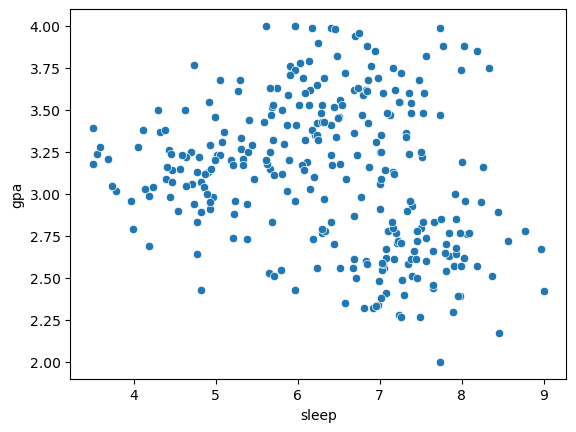

In [4]:
# Make picture one
sea2 = sns.scatterplot(x="sleep", y="gpa",data=students)


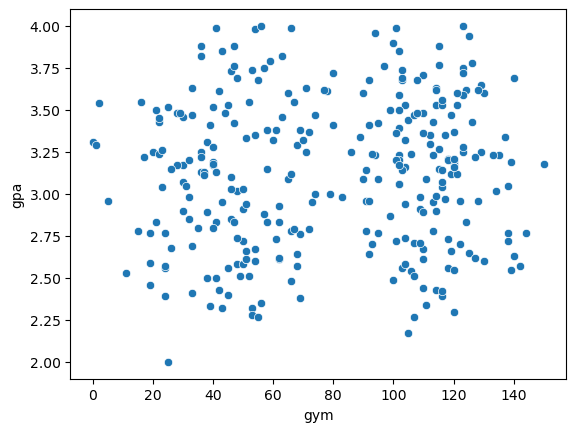

In [5]:
# Make picture two
sea2 = sns.scatterplot(x="gym", y="gpa",data=students)

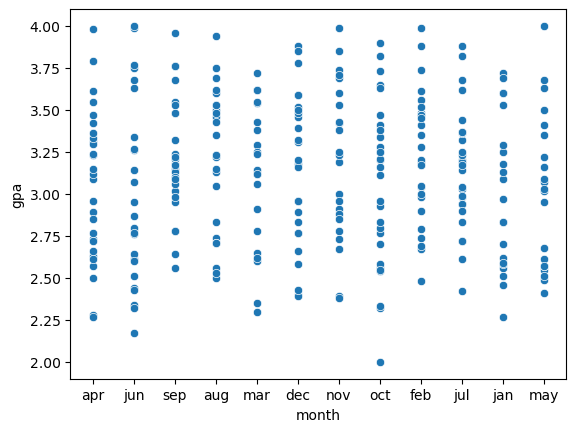

In [6]:
# Make picture three
sea2 = sns.scatterplot(x="month", y="gpa",data=students)


Looking at your images and those shared with your fellow computer scientists, what do you notice about this dataset? Write a few observations

_Markdown Block for you!_

The data is pretty evenly distributed

### From plots to groups

The goal of k-means is to cluster groups of points. We can think of this as labeling points such that points in the same group all have the same label.   

Looking at your images from above, how many groups do you see? What leads you to say that number? 

_Markdown Block for you!_

it looks like gym and gpa MIGHT have 2 clusters but idk

Now that you have a guess for how many groups there are, how would you decide which points get which grouping labels? What ideas do you have for translating your ideas into code? Jot down a few ideas below and then have a quick discussion with your gather carpet. 

_Markdown Block for you!_

they are in the same area/have similar values

#### A note

As we move through this course, we will build towards a deep understanding of our algorithms by working iteratively:
1. We'll often start by writing out in words (usually pseudo code) the broad steps. 
2. Then we'll break each step down into pieces. 
3. Finally we'll put all the pieces back together

## k-Means
### Our first machine learning algorithm

The goal of k-means is to group data points into $k$ groups, which we call _clusters._ We can think of the finding of these clusters as the labeling of points that you just brainstormed with your gather carpet. 

At the beginning of k-means, we input our dataset and $k$, the number of clusters that we believe exist in the data. Then k-means works to split the data into $k$ clusters/groups. It does so **iteratively** by first finding centers of each group (holding the group labels constant) and then reassigning group labels (by holding the centers constant). The basic outline is as follows:

0. Initialize $k$ "centers." Each center represents the middle of a group and these first centers are likely 1) not in the center of any meaningful group and 2) not based on any groupings (because you haven't assigned any points to groups yet). We'll call these the centers of our 0<sup>th</sup> clusters          
Repeat the following until convergence/stopping condition/maximum iterations: 
   1. Assign each datapoint to the closest center.    
      The subset of the datapoints assigned to each center is the _cluster_ for that center.
   2. For each cluster (ie. for all the points with group label 1, then for all the points with group label 2, etc), re-compute the associated center. 
   
In the below code block, sketch out how you would like to do this in comments:

In [7]:
# Add your pseudo code here
# You do not need to write code! Your outline can look very similar 
#     to the one above.
#
# Remember this is just the first time we're considering k-means, 
#     so this is just a broad roadmap We'll code each piece in 
#     detail later in this lab


# Step 0:


# Repeat the following (how would you do the repeating part?)


#    Step A: 


#    Step B:


# How does the repeating continue and/or stop?





### Preparing the data

For the next part of this lab, we are going to select just two columns of our data set. Let's create a new data frame called `justtwo` that has only the `coffee` and `sleep` variables. Note that you want to **return** a dataframe in this action.

In [18]:
# Creating a new dataframe `justtwo`

justtwo = students.iloc[:,[0,2]]
justtwo
# Be sure to check what you created! Perhaps by looking at the top of the data




,coffee,sleep
0,0.7,6.14
1,2.0,6.98
2,1.5,7.25
3,2.1,5.02
4,0.7,4.93
...,...,...
295,0.6,5.67
296,0.5,5.81
297,1.3,7.01
298,2.1,6.25


Before moving on, create a plot of coffee vs. sleep and decide how many clusters you think exists in this data. 

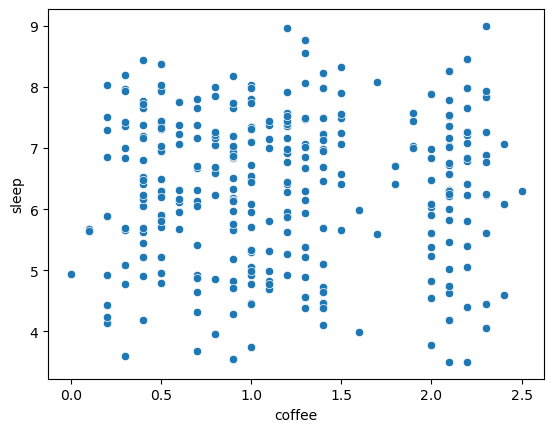

In [19]:
# Make a plot here

myplot = sns.scatterplot(x="coffee", y="sleep",data=justtwo)
#probably 3 clusters

Given your plot, how many clusters do you think there are in this data? 

**Wait here to chat with your fellow computer scientists**

## Step 0 - Initialize clusters' centers

There are a few ways to initialize this algorithm. We can:
1. Start by placing $k$ centers anywhere on the area covered by our data. This choice means that these initial centers are not points within our data. 
2. Choose $k$ of our datapoints to serve as initial cluster centers. 

It does not really matter which you do, but many algorithms begin with datapoints within the dataset. In the below block we use `.sample()` to help us do this. 

In [20]:
# Choose k data points to act as the initial clusters for k-means

centers= justtwo.sample(2, random_state = 1)
centers

,coffee,sleep
189,2.0,5.61
123,0.3,6.84


Find the output on your above plot. Are you happy with those as centers of the clusters? 

_Bonus round:_ Play with the `random_state` value. What happens? What do you think `random_state` does? 

**Wait here to chat with your fellow computer scientists**

## Repeating steps

### Step 1 (repeats) - Assign each data point to the closest center
_Note_ we are going to do this without optimization. The goal is to understand the _general idea_ of what is happening. 

In the below code block, sketch out how you would like to do this in comments:

In [ ]:
# Pseudo code for assigning each data point to the closest center
# Reminder: You do not need to write code! Keep it short and in words.





#### In pieces

While it is easy to say "assign each data point to the closest center", the act of doing this in code takes a few steps. For each datapoint, we need to:   
   a. Compute the distance from the datapoint to each of the centers   
   b. Figure out which one is the smallest distance   
   c. Assign the center with the smallest distance to the data point   
   
   
**Check your psuedo code from above with this outline** What similarities do you see? Any differences? 

#### Step 1A - Compute the distance 

The "usual" distance is called Euclidean distance. This is the one that we are used to seeing. If $X = (x_1,x_2)$ and $Y = (y_1,y_2)$:

$dist(X,Y) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}$

(There are other distances, but let's use this one for now.)

How do we write such a distance? This is where we turn to the package `scipy`. To use `scipy`, we need to turn our data and our centers into a numpy array using `.to_array()`. I've completed the first transition for `justtwo_np`. How would you do this for `centers_np`? 

In [21]:
justtwo_np = justtwo.to_numpy()
centers_np = centers.to_numpy()

Now to use `cdist` from the distance sub-module withing `scipy`. There are three inputs: first set of data, second set of data, and the kind of distance that we want to compute. 

In [22]:
dists = distance.cdist(justtwo_np, centers_np, 'euclidean')

What is the shape of `dists`? Does this shape make sense? Why or why not?

In [23]:
dists.shape

(300, 2)

**Wait here to chat with your fellow computer scientists**

####    
####    
####    
####    
####    
####    
_This space is intentionally left blank_
####    
####    
####    
####    
####    
####  



**Distance matrix**

The matrix the we constructed here is as follows:

<table>
<thead>
<tr>
<th></th>
<th>Center 1</th>
<th>Center 2</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>Student 1</strong></td>
<td>dist(Student 1, Center 1)</td>
<td>dist(Student 1, Center 2)</td>
</tr>
<tr>
<td><strong>Student 2</strong></td>
<td>dist(Student 2, Center 1)</td>
<td>dist(Student 2, Center 2)</td>
</tr>
<tr>
<td><strong>Student 3</strong></td>
<td>dist(Student 3, Center 1)</td>
<td>dist(Student 3, Center 2)</td>
</tr>
<tr>
<td><strong>Student 4</strong></td>
<td>dist(Student 4, Center 1)</td>
<td>dist(Student 4, Center 2)</td>
</tr>
<tr>
<td>...</td>
    <td>...</td>
    <td>...</td>
</tr>
</tbody>
</table>

Again, what is the shape of `dists`? Does this shape make sense? Why or why not?

_Markdown cell for your notes_

#### Step 1B - Figure out the smallest distance

In this step, we use the above distance matrix to determine which center each student is nearer. Notice that we do not care 1) how much closer, 2) what the distance is, or 3) how each data point relates to each other. All we care about is which center is closest. 

This situation lends itself to `argmin` which means "argument minimum" or "tell me where I achieve the minimum (but not what the value of the minimum is. 

If what we want is **one** location of a minimum per data point, what is the output size of what we want? 

Try the below code block. What happens? How do you know? Is this what we want. 

In [24]:
clusters = np.argmin(dists)
clusters

247

Weird... Why did this happen?

In `numpy`, the method `argmin` can have two inputs: 1) the numpy array we want more information about and 2) the _axis_ that we are interested in. When `numpy` looks at an array, it can look across axis 0 or 1 (either look over the rows or over the columns, respectively). If we don't tell `numpy` which to use, it assumes we want to treat the whole array as one total object instead of as a collection of objects (or a collection of data rows). 

Try both in the below code blocks. What happens? Which _axis_ lens should we use and why? (Hint: check the shape of the data.)

In [32]:
clusters = np.argmin(dists, axis=0)
clusters

array([189, 123])

In [30]:
clusters = np.argmin(dists, axis=1)
clusters

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

_Markdown cell for your notes about_ `axis` _flag_

**Wait here to chat with your fellow computer scientists** What's something new or cool that you've learned today? 

#### Step 1C - Recompute the centers

At this point in the loop, we have a) determined the distances between each data point and each center and b) figured out how to assign each data point to the closest center. The last step within the k-means loop is to update the centers for each cluster. 

The centers should exist as the average of the clusters. **Note** this means that the center of the cluster _may not_ be a data point in the dataset. 

To compute the new centers, we need to:
1. Select one cluster to examine
2. Take the subset of the data that is in that cluster
3. Compute the average of that subset

In the below code block, first write pseudo-code for these steps. Then use 1) a boolean statement to select each cluster, and 2) `np.mean()` to get the average. Finally 3) overwrite the row in `centers_np` associated to that cluster. 

In [ ]:
# Recompute your clusters' centers
# 1. Pseudo code first
# 2. Then fill in code


# Step 1. Select one cluster to examine
inds0 = clusters == 0

# Step 2. Take the subset of the data that is in that cluster


# Step 3. Compute the average of that subset
my_avg = np.mean(onecluster)

In [1]:
# Print your output here



### Interlude

**Question:** Are you staring at the pseudo code thinking about a nested `if` statement inside of a `for` loops? 

Generally when we are going to do something over and over again, we reach for `for` loops. In this case, we might think about `Step 2. Take the subset of the data that is in that cluster` as "look at each data point individually and check if it is in our chosen cluster." 

This is a totally reasonable approach... But `for` loops are "expensive" in python (and most programming languages). So we should try to avoid them when possible. And there is another trick that we might want to employ in this situation that can help us avoid a `for` loop: 

##### The Index Trick

When I have a programming object that has an order (like a list, array, or data frame), I can leverage the idea of an index to isolate part of that object. Noting that each item in the ordered object is tethered to its location -- also known as its _index_ -- I can use a boolean expression to find the indices associated to a particular feature and then use that list of indices to isolate the rows that I'm interested in. 

For example, say that I have two-D array with the number credits each Smithie is enrolled in and the number of stickers on their personal computing devices, and that we would like to just consider students with less than 10 stickers on their devices. 

In [3]:
# Made up data about 6 Smithies: Row number, number of credits, and number of stickers:

smith_stickers = np.array([[1,22,0],
                           [2,18,5],
                           [3,15,67],
                           [4,16,0],
                           [5,21,14],
                           [6,16,10]
                           ])

The first step of the index trick is to isolate the indices with the feature that we are interested in. For this example, we are only interested in students with less than 10 stickers on their devices. So we start by building an index called `inds` that examines information on the third column:

In [4]:
inds = smith_stickers[:,2] < 10

What is in `inds`? What does it "look like"? 

In [ ]:
# For your own work

Now that we have our indices, the next trick is to use this index to isolate just the students that we are interested in: 

In [5]:
smith_stickers[inds,:]

array([[ 1, 22,  0],
       [ 2, 18,  5],
       [ 4, 16,  0]])

**Important** Notice that:

- In the first step, we place `:` in the first position to build our index. This is because we are using the information across **all** the rows in the third column to build our index. 
- In the second step, we place the `:` in the second position because we are keeping the information across **all** the columns for the selected rows. 

**Question:** How could you apply the index trick to your outline for Step 1C? 

**{End of interlude}**

**Wait here to chat with your fellow computer scientists**

Check in with each other on your code so far and share your ideas. 

### Repeat all of Step 1 

We have to stop at some point. This stop can be triggered by any number of things, which we call the _stopping condition(s)_. 

Come up with at least 2 ideas of what you think would be good stopping conditions. 

####    
####    
####    
####    
####    
####    
_This space is intentionally left blank_
####    
####    
####    
####    
####    
####  

## Stopping conditions:

Stopping conditions for k-means can take a few forms:
1. Maximum number of repetitions of the looping steps, OR
2. When additional repetitions of the loop will not change the clusters

There are other kinds of stopping conditions, but these are the two that we will examine. 

For each of the stopping conditions above, how would you implement this in code? Write pseudo-code for k-means for each one in the below two code blocks:

In [ ]:
# Pseudo Code for Stopping Condition Max number of repeats
# Reminder: You do not need to write code! Keep it short and in words.
# (Hint: You can copy and adapt pseudocode from above.)



In [ ]:
# Pseudo Code for Stopping Condition clusters unchanged



#### Check in with your fellow computer scientists

Show your ideas to another person in the course. What questions do they have for you? What questions do you have for them? 

## Putting it all together

In the below code block, write out a full implementation using one of the stopping conditions. Run it on the `justtwo_np` array and make a plot of your results. 

Do you agree with your output? 

In [ ]:
# Your k-means here



In [ ]:
# Your visualization here



### Final Thoughts

To finish up this lab, read about k-means in `sklearn` and create a post to **#lab03_submission** channel on slack sharing one surprising thing about k-means that you learned by first implementing it in this lab.  

If your have questions from this lab, post them to #lab_questions with the same preamble (i.e. starting with **Lab3**). If you have the same question, please use one of the emoji's to upvote the question. If you would like to answer someone's question, please use the thread function. This will tie your answer to their question. 

#### Resources Consulted

0. _Python for Data Analysis_
1. _Data Science from Scratch_ by Joel Grus
2. [pandas sample helpfile](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
3. [cdist helpfile](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.spatial.distance.cdist.html)
4. [to_numpy helpfile](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html)
5. [Tables in github markdown](https://github.github.com/gfm/#tables-extension-)
6. [Intro to k-means](https://www.datascience.com/blog/k-means-clustering)
7. [k-Means Clustering](https://www.saedsayad.com/clustering_kmeans.htm)